## COMPAS Datasets Data Analisys: 
### COMPAS Raw Scores Head

In [1]:

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

compas_df=pd.read_csv('compas-scores-raw.csv')
column_names = compas_df.columns.tolist()
print(column_names)
compas_df.head(5)



['Person_ID', 'AssessmentID', 'Case_ID', 'Agency_Text', 'LastName', 'FirstName', 'MiddleName', 'Sex_Code_Text', 'Ethnic_Code_Text', 'DateOfBirth', 'ScaleSet_ID', 'ScaleSet', 'AssessmentReason', 'Language', 'LegalStatus', 'CustodyStatus', 'MaritalStatus', 'Screening_Date', 'RecSupervisionLevel', 'RecSupervisionLevelText', 'Scale_ID', 'DisplayText', 'RawScore', 'DecileScore', 'ScoreText', 'AssessmentType', 'IsCompleted', 'IsDeleted']


,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0


### COMPAS Raw Scores Data Analysis: Race and Sex Comparison
 

/var/folders/pb/pp2lsv2s6rd6_my_0c3gmxsw0000gn/T/ipykernel_49374/3331234105.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Ethnic_Code_Text', y='DecileScore', data=compas_df, palette='muted')
/var/folders/pb/pp2lsv2s6rd6_my_0c3gmxsw0000gn/T/ipykernel_49374/3331234105.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sex_Code_Text', y='DecileScore', data=compas_df, palette='muted')


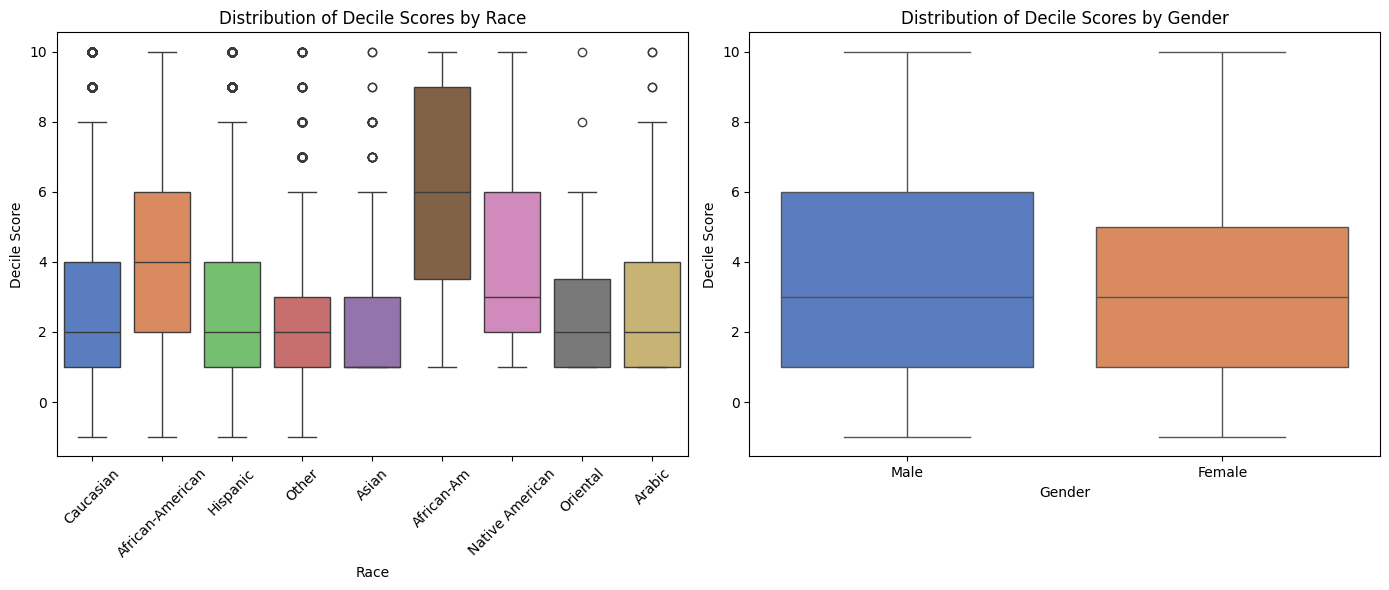

In [ ]:

# I select the important colums
compas_df = compas_df[['Sex_Code_Text', 'Ethnic_Code_Text',
                        'DecileScore', 'ScoreText']]
compas_df['DecileScore'] = pd.to_numeric(compas_df['DecileScore']
                                         , errors='coerce')
 #errors='coerce': The non-numeric values are replaced with NaN.
compas_df = compas_df.dropna(subset=['DecileScore'])

plt.figure(figsize=(14, 6))

# Boxplot for 'Ethnic_Code_Text'
plt.subplot(1, 2, 1)
sns.boxplot(x='Ethnic_Code_Text', y='DecileScore',
             data=compas_df, palette='muted')
plt.title('Distribution of Decile Scores by Race')
plt.xlabel('Race')
plt.ylabel('Decile Score')
plt.xticks(rotation=45)

# Boxplot for 'Sex_Code_Text'
plt.subplot(1, 2, 2)
sns.boxplot(x='Sex_Code_Text', y='DecileScore',
             data=compas_df, palette='muted')
plt.title('Distribution of Decile Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Decile Score')

plt.tight_layout()
plt.show()


#  From the following plot, it is notable how the dataset is 
#  heavily biased aginst the african-american community. 
#  The difference between male and female is not as evident 
# to make me think about some kind of bias of the data.

### 

### Violin Plot: Race and Sex Decile Score Trend

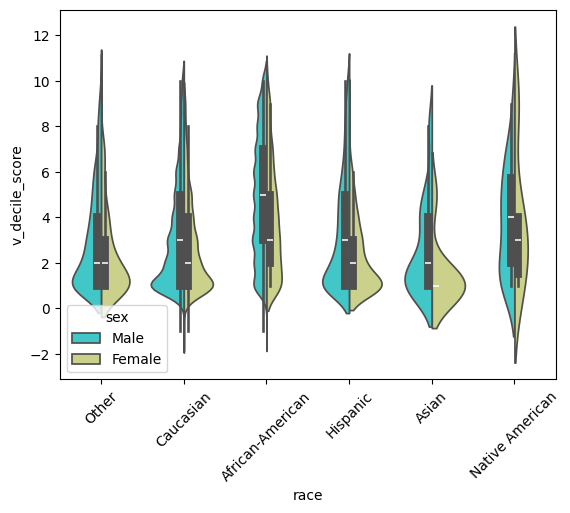

In [3]:
df2=pd.read_csv('cox-violent-parsed.csv')
# column_names = df2.columns.tolist()
# print(column_nàames)
df2.head(5)

sns.violinplot(x="race", y="v_decile_score",data=df2,hue='sex'
               ,split=True,palette="rainbow")
plt.xticks(rotation=45)
plt.show()

#  The following plot clearly shows how the scores distribution 
# is more linear for african-american and Native-American. 
#  There are signs of bias, because the trends regarding the other 
# races show how they are less likely to commit noew crimes in the future.

## Analysis of COMPAS Scores and Recidivism

### Average COMPAS Score, Recidivism Rates & Violin Plot Visualization

/var/folders/pb/pp2lsv2s6rd6_my_0c3gmxsw0000gn/T/ipykernel_49374/2036159289.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df3, x='race', y='decile_score', estimator='mean', ci='sd') #Standard Deviation


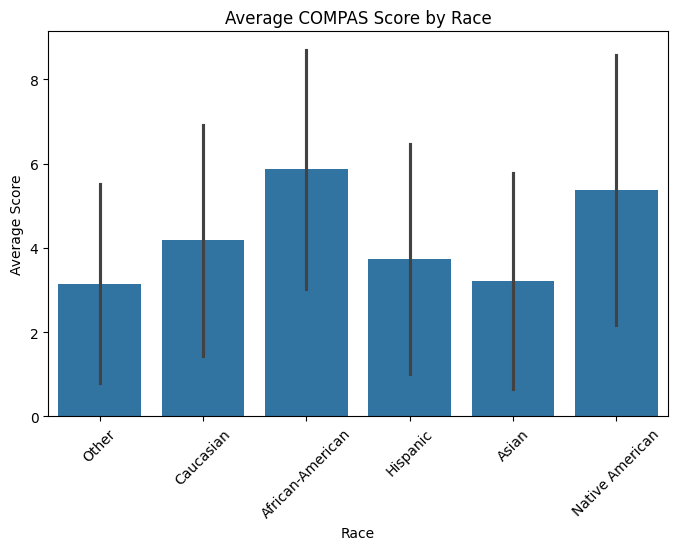

/var/folders/pb/pp2lsv2s6rd6_my_0c3gmxsw0000gn/T/ipykernel_49374/2036159289.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df3, x='race', y='is_recid', estimator='mean', ci='sd') #Standard Deviation


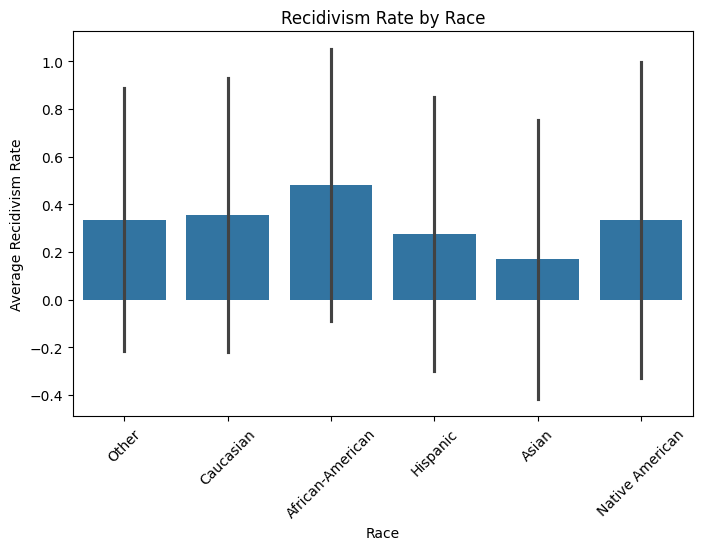

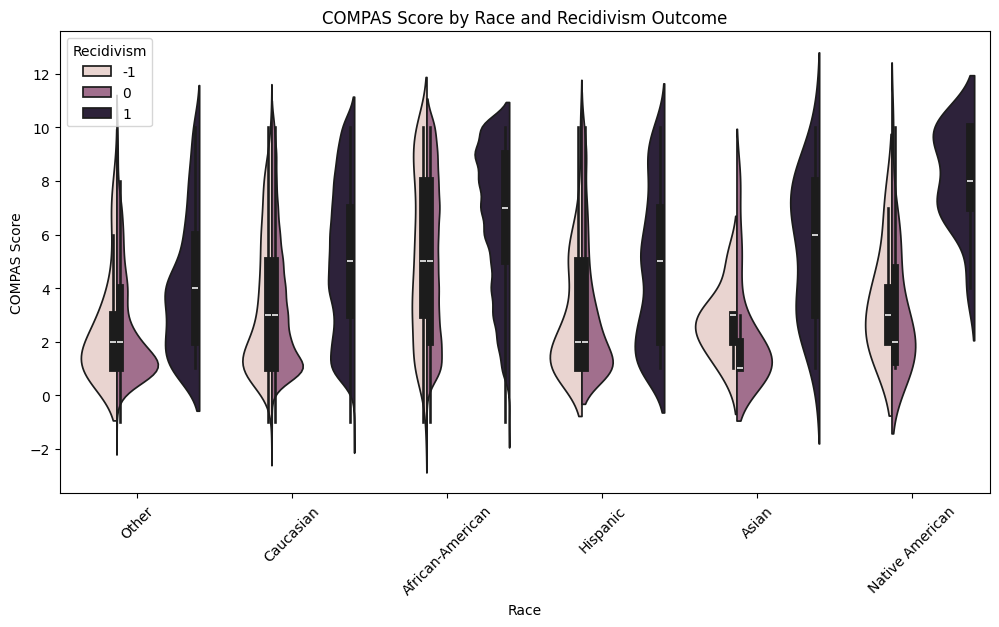

In [ ]:
df3=pd.read_csv('cox-violent-parsed_filt.csv')
# column_names = df3.columns.tolist()
# print(column_names)
df3.head(5)
df3.columns 

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Mean COMPAS score by race
plt.figure(figsize=(8, 5))
#sd= Standard Deviation
sns.barplot(data=df3, x='race', y='decile_score',
             estimator='mean', ci='sd')
plt.title("Average COMPAS Score by Race")
plt.xlabel("Race")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.show()

# 2. Recidivism rate by race
plt.figure(figsize=(8, 5))
sns.barplot(data=df3, x='race', y='is_recid',
             estimator='mean', ci='sd') 
plt.title("Recidivism Rate by Race")
plt.xlabel("Race")
plt.ylabel("Average Recidivism Rate")
plt.xticks(rotation=45)
plt.show()

# 3. COMPAS score by race and recidivism outcome
plt.figure(figsize=(12, 6))
sns.violinplot(data=df3, x='race', y='decile_score',
                hue='is_recid', split=True) 
plt.title("COMPAS Score by Race and Recidivism Outcome")
plt.xlabel("Race")
plt.ylabel("COMPAS Score")
plt.legend(title="Recidivism", loc='upper left')
plt.xticks(rotation=45)
plt.show()


# The plots reveal that African Americans have higher average
# recidivism rates and scores compared to other racial groups,
# along with a broader spread in their score distributions. 
# The violin plot highlights this showing, especially toward higher scores associated with recidivism,
# while groups like Asians and Hispanics display lower, 
# more compact score distributions. This suggests notable disparities 
# in score allocation across races in the dataset.